# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [113]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [114]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [115]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [116]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [117]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [118]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [119]:
#df.sample(n = x);dfの中からランダムにx行(df.sample(axis = 1)で列)分をランダムに抽出する。
df_target.sample(n = 10)

,target
59,1
40,0
15,0
51,1
88,1
122,2
109,2
113,2
16,0
116,2


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

プロットの形一覧
https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

In [120]:
#モジュールのインストール
! pip install japanize-matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


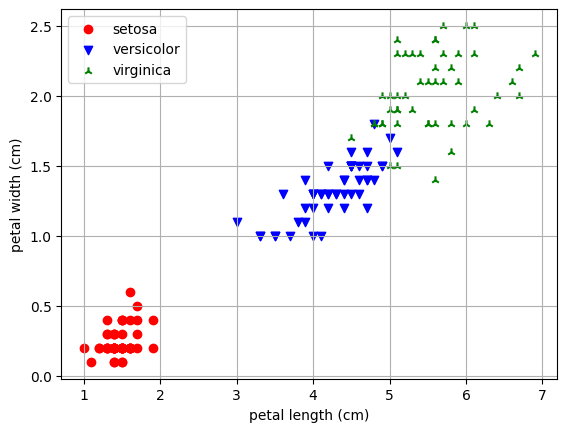

In [121]:
#やる事
#df作成
#0,1,2ごとにmask作成
#マスクごとにplt.scatter()

#drf作成
from sklearn.datasets import load_iris
iris = load_iris()

plt_data = iris.data
plt_feature_names = iris.feature_names
df_data_target = pd.DataFrame(data=plt_data, columns=plt_feature_names)
plt_target = iris.target
plt_target_names = iris.target_names
df_plt_target = pd.DataFrame(data=plt_target, columns=['plt_target'])
df_data_target['category'] = df_target['target']

#0,1,2ごとにmask作成
#- 0 が `setosa`（ヒオウギアヤメ）
#- 1 が `versicolor`（ブルーフラッグ）
#- 2 が `virginica`（バージニカ）
mask_0_setosa = df_data_target['category'] == 0
mask_1_versicolor = df_data_target['category'] == 1
mask_2_virginica = df_data_target['category'] == 2

df_0_setosa = df_data_target[mask_0_setosa]
df_1_versicolor = df_data_target[mask_1_versicolor]
df_2_virginica = df_data_target[mask_2_virginica]

#マスクごとにplt.scatter()
plt.scatter(df_0_setosa['petal length (cm)'] , df_0_setosa['petal width (cm)'] , color = 'r')
plt.scatter(df_1_versicolor['petal length (cm)'] , df_1_versicolor['petal width (cm)'] , color = 'b' , marker = "v")
plt.scatter(df_2_virginica['petal length (cm)'] , df_2_virginica['petal width (cm)'] , color = 'g' , marker = "2")


plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
labels = ['setosa' , 'versicolor' , 'virginica']
plt.legend(labels , loc = 'upper left' , bbox_to_anchor = (0 , 1))
plt.grid()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [122]:
x = df_data
y = df_target

from sklearn.model_selection import train_test_split
#a_train, a_test = train_test_split(a, test_size = 0.3 , random_state = 0);(aというdf(ndarray)をa_trainとa_testにtest用を全体の30%になるようにランダムに分割する)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [123]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('t_train :',y_train.shape)
print('x_test :',y_test.shape)

x_train : (120, 4)
x_test : (30, 4)
t_train : (120, 1)
x_test : (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [124]:
#ランダムフォレストの学習モデルのimport
from sklearn.ensemble import RandomForestClassifier

reg_model = RandomForestClassifier()

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [125]:
reg_model.fit(x_train , y_train)

c:\Users\shouh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [126]:
reg_model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [127]:
#.score(予測値 , 目標値)；目的地に対して予測値の精度を評価
reg_model.score(x_test , y_test)

0.9666666666666667

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。